## Python Program

In [17]:
import swat
from getpass import getpass
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
server='pdcesx12145.exnet.sas.com' #definizione dei parametri per stabilire connessione al CAS
port_num=8777
user='sasdemo'
pwd = getpass("Type Password:")

Type Password:········


In [4]:
s = swat.CAS(server,
                port_num,
                user, 
                pwd,
                protocol='http') #viene attivata la connessione

In [5]:
status=s.serverstatus() #verifica dell'effettiva attivazione della connessione al server
print(status)

NOTE: Grid node action status report: 1 nodes, 9 total actions executed.
[About]

 {'CAS': 'Cloud Analytic Services',
  'Copyright': 'Copyright Â© 2014-2018 SAS Institute Inc. All Rights Reserved.',
  'ServerTime': '2020-05-15T14:04:24Z',
  'System': {'Hostname': 'sasserver.demo.sas.com',
   'Linux Distribution': 'CentOS Linux release 7.7.1908 (Core)',
   'Model Number': 'x86_64',
   'OS Family': 'LIN X64',
   'OS Name': 'Linux',
   'OS Release': '3.10.0-1062.12.1.el7.x86_64',
   'OS Version': '#1 SMP Tue Feb 4 23:02:59 UTC 2020'},
  'Version': '3.05',
  'VersionLong': 'V.03.05M0P11112019',
  'license': {'expires': '02Dec2020:00:00:00',
   'gracePeriod': 45,
   'maxCPUs': 9999,
   'site': 'DEMOCENTER - Prod 19w47 19Nov2019 : Kitchen v5',
   'siteNum': 70180938,
   'warningPeriod': 45}}

[nodestatus]

 Node Status
 
                      name        role  uptime  running  stalled
 0  sasserver.demo.sas.com  controller   1.639        0        0

[server]

 Server Status
 
    nodes  acti

In [6]:
test = s.CASTable("HMEQ", caslib='Public', replace=False)

In [7]:
test.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1.0,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1.0,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1.0,1500.0,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [8]:
test.table.columninfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,BAD,,1,double,8,12,,0,0
1,LOAN,,2,double,8,12,,0,0
2,MORTDUE,,3,double,8,12,,0,0
3,VALUE,,4,double,8,12,,0,0
4,REASON,,5,varchar,7,7,,0,0
5,JOB,,6,varchar,7,7,,0,0
6,YOJ,,7,double,8,12,,0,0
7,DEROG,,8,double,8,12,,0,0
8,DELINQ,,9,double,8,12,,0,0
9,CLAGE,,10,double,8,12,,0,0


In [9]:
test.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,BAD,0.000000,1.000000,5960.0,0.0,0.199497,1.189000e+03,0.399656,0.005177,1.597245e-01,1.189000e+03,9.517985e+02,200.331950,38.536557,2.720203e-290,1.504317,0.263057
1,LOAN,1100.000000,89900.000000,5960.0,0.0,18607.969799,1.109035e+08,11207.480417,145.172668,1.256076e+08,2.812185e+12,7.484958e+11,60.229464,128.178190,0.000000e+00,2.023781,6.932590
2,MORTDUE,2063.000000,399550.000000,5442.0,518.0,73760.817200,4.014064e+08,44457.609458,602.652327,1.976479e+09,4.036208e+13,1.075402e+13,60.272664,122.393649,0.000000e+00,1.814481,6.481866
3,VALUE,8000.000000,855909.000000,5848.0,112.0,101776.048741,5.951863e+08,57385.775334,750.413385,3.293127e+09,7.983063e+13,1.925491e+13,56.384362,135.626644,0.000000e+00,3.053344,24.362805
4,YOJ,0.000000,41.000000,5445.0,515.0,8.922268,4.858175e+04,7.573982,0.102642,5.736521e+01,7.457556e+05,3.122962e+05,84.888530,86.926047,0.000000e+00,0.988460,0.372072
5,DEROG,0.000000,10.000000,5252.0,708.0,0.254570,1.337000e+03,0.846047,0.011674,7.157951e-01,4.099000e+03,3.758640e+03,332.343880,21.805933,5.478603e-101,5.320870,36.872763
6,DELINQ,0.000000,15.000000,5380.0,580.0,0.449442,2.418000e+03,1.127266,0.015369,1.270728e+00,7.922000e+03,6.835248e+03,250.814336,29.244135,1.326786e-174,4.023150,23.565449
7,CLAGE,0.000000,1168.233561,5652.0,308.0,179.766275,1.016039e+06,85.810092,1.141398,7.363372e+03,2.242600e+08,4.161041e+07,47.734255,157.496508,0.000000e+00,1.343412,7.599549
8,NINQ,0.000000,17.000000,5450.0,510.0,1.186055,6.464000e+03,1.728675,0.023416,2.988317e+00,2.395000e+04,1.628334e+04,145.749978,50.651202,0.000000e+00,2.621984,9.786507
9,CLNO,0.000000,71.000000,5738.0,222.0,21.296096,1.221970e+05,10.138933,0.133848,1.027980e+02,3.192071e+06,5.897519e+05,47.609351,159.106532,0.000000e+00,0.775052,1.157673


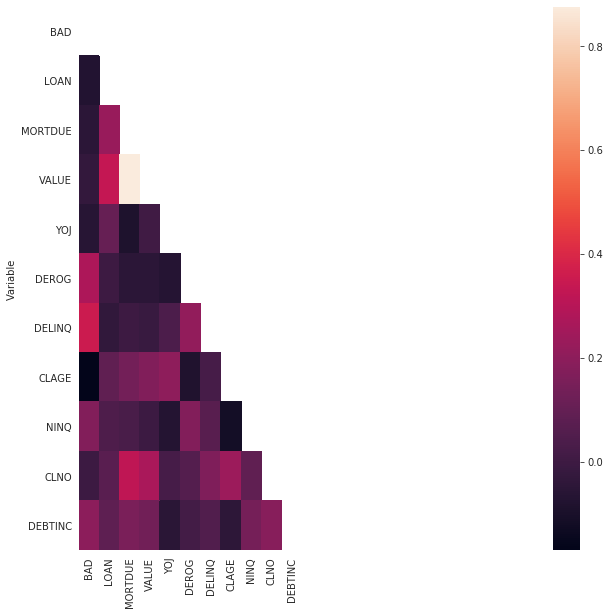

In [19]:
corr = test.correlation(simple=False).Correlation
corr = corr.set_index('Variable')
corrl = corr.where(np.tril(np.ones(corr.shape),-1).astype(np.bool))
plt.figure(figsize = (10,10))       
with sns.axes_style('white'):
    hm = sns.heatmap(corrl)
    hm.set_yticklabels(corrl.index.str.replace('_', ' '), rotation=0)
    hm.set_xticklabels(corrl.index.str.replace('_', ' '), rotation=90)